<a href="https://colab.research.google.com/github/ray-wynne/ray-wynne/blob/main/AGNsNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Necessary Libraries

In [ ]:
# Using the PyTorch Framework
!pip install livelossplot
!pip install imblearn

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

from imblearn.over_sampling import SMOTE

from livelossplot import PlotLosses

from sklearn.model_selection import train_test_split

import pandas

from pandas import DataFrame as df

from scipy.stats import pearsonr

# For displaying images later
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

torch.manual_seed(0)

In [ ]:
# Download data
params = pandas.read_csv('Fulldata_woSLOB_&_Stripes.csv')
# params = pandas.read_csv('AGN_Set_NoInf.csv')

# plt.hist(params['z'])
# plt.show()

# Remove unnecesary columns
params.drop(['Unnamed: 0', 'X.name', 'LogRedshift'], axis=1, inplace=True)

keep = ["z", "LogFlux1.100m", "LogEnergy_Flux100", "LogSignificance", "Frac_Variability", "LogHighest_Energy", "Lognu","Lognufnu", "PL_Index", "LogPivot_Energy", "LP_Index", "LP_beta","w4", "Gaia_G_Magnitude", "LogVariability_Index"]

# params['Flux1.100m'] = np.exp(params["LogFlux1.100m"])
# params['Energy_Flux100'] = np.exp(params["LogEnergy_Flux100"])
# # params['Significance'] = np.exp(params["LogSignificance"])
# params['Highest_Energy'] = np.exp(params["LogHighest_Energy"])
# params['nu'] = np.exp(params["Lognu"])
# params['nufnu'] = np.exp(params["Lognufnu"])
# params['Pivot_Energy'] = np.exp(params["LogPivot_Energy"])
# params['Variability_Index'] = np.exp(params["LogVariability_Index"])

# keep = ["z", "Flux1.100m", "Energy_Flux100", "Frac_Variability", "Highest_Energy", "nu","nufnu", "PL_Index", "Pivot_Energy", "LP_Index", "LP_beta","w4", "Gaia_G_Magnitude", "Variability_Index"]

params_keep = params[keep]

zs_keep = params_keep['z']

z_binary = [1 if z < 1 else 0 for z in zs_keep]

# sum(z_binary)

ros = SMOTE(sampling_strategy='minority')
params, zs = ros.fit_resample(params_keep, z_binary)

zs = params[:, 0]

params = pandas.DataFrame(params[:, 1:])
pca = PCA(n_components=8)
pca.fit(params)

columns = ['pca_%i' % i for i in range(8)]
df_pca = df(pca.transform(params), columns=columns, index=params.index)

df_pca['z'] = zs

train, val, test = np.split(df_pca.sample(frac=1), [int(.6*len(df_pca)), int(.8*len(df_pca))])

train_labels, val_labels, test_labels = train.pop('z'), val.pop('z'), test.pop('z')
train, val, test = (train-df_pca.mean())/df_pca.std(), (val-df_pca.mean())/df_pca.std(), (test-df_pca.mean())/df_pca.std()

train.drop('z', 1, inplace=True), val.drop('z', 1, inplace=True), test.drop('z', 1, inplace=True)

X_train, z_train = np.array(train).astype('float32'), np.array(train_labels).astype('float32')
X_val, z_val = np.array(val).astype('float32'), np.array(val_labels).astype('float32')
X_test, z_test   = np.array(test).astype('float32'), np.array(test_labels).astype('float32')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# # # Download data
# params = pandas.read_csv('Fulldata_woSLOB_&_Stripes.csv')
# # params = pandas.read_csv('AGN_Set_NoInf.csv')

# # Remove unnecesary columns
# params.drop(['Unnamed: 0', 'X.name', 'LogRedshift'], axis=1, inplace=True)

# keep = ["z", "LogFlux1.100m", "LogEnergy_Flux100","Frac_Variability", "LogHighest_Energy", "Lognu","Lognufnu", "PL_Index", "LogPivot_Energy", "LP_Index", "LP_beta","w4", "Gaia_G_Magnitude", "LogVariability_Index"]

# params['Flux1.100m'] = np.exp(params["LogFlux1.100m"])
# params['Energy_Flux100'] = np.exp(params["LogEnergy_Flux100"])
# # params['Significance'] = np.exp(params["LogSignificance"])
# params['Highest_Energy'] = np.exp(params["LogHighest_Energy"])
# params['nu'] = np.exp(params["Lognu"])
# params['nufnu'] = np.exp(params["Lognufnu"])
# params['Pivot_Energy'] = np.exp(params["LogPivot_Energy"])
# params['Variability_Index'] = np.exp(params["LogVariability_Index"])

# keep = ["z", "Flux1.100m", "Energy_Flux100", "Frac_Variability", "Highest_Energy", "nu","nufnu", "PL_Index", "Pivot_Energy", "LP_Index", "LP_beta","w4", "Gaia_G_Magnitude", "Variability_Index"]

# params = params[keep]

# # Create training/validation/test
# train, val, test = np.split(params.sample(frac=1), [int(.6*len(params)), int(.8*len(params))])

# params.drop('z', axis=1, inplace=True)


# # # Get labels
# train_labels, val_labels, test_labels = train.pop('z'), val.pop('z'), test.pop('z')
# train, val, test = (train-params.mean())/params.std(), (val-params.mean())/params.std(), (test-params.mean())/params.std()


# train, train_labels = np.array(train).astype('float32'), np.array(train_labels).astype('float32')
# val, val_labels = np.array(val).astype('float32'), np.array(val_labels).astype('float32')
# test, test_labels   = np.array(test).astype('float32'), np.array(test_labels).astype('float32')

In [ ]:
# # Display dataset information
print("Downloaded the following data:")
print(f"train_data has shape {X_train.shape}, containing {X_train.shape[0]} images represented as ({X_train.shape[1]}, 1) vectors")
print(f"val_data has shape {X_val.shape}, containing {X_val.shape[0]} images represented as ({X_val.shape[1]}, 1) vectors")
print(f"test_data has shape {X_test.shape}, containing {X_test.shape[0]} images represented as ({X_test.shape[1]}, 1) vectors")

Downloaded the following data:
train_data has shape (585, 8), containing 585 images represented as (8, 1) vectors
val_data has shape (195, 8), containing 195 images represented as (8, 1) vectors
test_data has shape (196, 8), containing 196 images represented as (8, 1) vectors


In [ ]:
# We'll create a Dataset class to use with PyTorch's Built-In Dataloaders
class GRBDataset(Dataset):
    '''
    A custom dataset class to use with PyTorch's built-in dataloaders.
    This will make feeding images to our models much easier downstream.

    data: np.arrays downloaded from Keras' databases
    vectorize: if True, outputed image data will be (784,)
                   if False, outputed image data will be (28,28)
    '''
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __getitem__(self, idx):
        grb_data = self.data[idx, :]
        grb_label = self.labels[idx]

        return grb_data, grb_label

    def __len__(self):
        return self.data.shape[0]

# Create MNISTDataset objects for each of our train/val/test sets
train_dataset = GRBDataset(X_train, z_train)
val_dataset   = GRBDataset(X_val, z_val)
test_dataset  = GRBDataset(X_test, z_test)

# Create a PyTorch dataloader for each train/val/test set
# We'll use a batch size of 256 for the rest of this assignment.
train_loader = DataLoader(train_dataset, batch_size=2)
val_loader = DataLoader(val_dataset, batch_size=2)
test_loader = DataLoader(test_dataset, batch_size=2)


# Display dataloader info
# print("Created the following Dataloaders:")
# print(f"train_loader has {len(train_loader)} batches of training data")
# print(f"val_loader has {len(val_loader)} batches of validation data")
# print(f"test_loader has {len(test_loader)} batches of testing data")

#  Create Training and Testing Functions

In this section, we'll be looking at the MNIST problem where our networks will take an image of any digit from $0-9$ as input and try to predict that digit. Note that in general, an image is described as a two-dimensional array of pixels. Here, the image is a <a href="https://en.wikipedia.org/wiki/Grayscale">grayscale</a> image, so each pixel is represented by only one integer value, in the range $0$ to $255$ (compared to RGB images where each pixel is represented by three integer values, encoding intensity levels in red, green, and blue color channels).

We'll use out-of-the-box neural network implementations using PyTorch. State-of-the-art systems have error rates of less than 0.5% percent on this data set (see <a href="http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#4d4e495354">this list</a>).  We'll be happy with an error rate less than 2% since we don't have all year...


We'll first implement the functions to `train` and `test` our classifiers. We've written most of the functions for you. Your job is to fill in the calculation of the loss.

As a reminder: For our loss function we will be using categorical cross-entropy loss between the output of our  model and our ground truth labels.

Note that:
* Use a built-in module instead of implementing the loss yourself!
* We are expecting a one-line solution in each case. Don't overthink this!
* The line you fill in for both `train()` and `test()` should be the same.

In [ ]:
# EDIT ME!

def trainer(model, device, train_loader, optimizer, val_loader=None):
    '''
    Function for training our networks. One call to train() performs a single
    epoch for training.

    model: an instance of our model, in this assignment, this will be your autoencoder

    device: either "cpu" or "cuda", depending on if you're running with GPU support

    train_loader: the dataloader for the training set

    optimizer: optimizer used for training (the optimizer implements SGD)

    val_loader: (optional) validation set to include 
    '''

    # Set the model to training mode.
    model.train()

    #we'll keep adding the loss of each batch to total_loss, so we can calculate
    #the average loss at the end of the epoch.
    total_loss = 0
    total_items = 0

    targ = []
    pred = []

    # We'll iterate through each batch. One call of train() trains for 1 epoch.
    # batch_idx: an integer representing which batch number we're on
    # input: a pytorch tensor representing a batch of input images.
    for batch_idx, (input,target) in enumerate(train_loader):
        # This line sends data to GPU if you're using a GPU
        targ = targ + [float(target[0])]

        input = input.to(device)
        target = target.type(torch.FloatTensor).to(device)

        # initialze the optimizer (the optimizer implements SGD)
        optimizer.zero_grad()

        # feed our input through the network
        output = model.forward(input)

        pred = pred + [float(output[0][0])]

        ## TODO: YOUR CODE HERE

        loss_function = nn.MSELoss()
        loss_value = loss_function(output[0], target)
        
        ## END YOUR CODE

        # Perform backprop
        loss_value.backward()
        optimizer.step()

        #accumulate loss to later calculate the average
        total_loss += loss_value
        total_items += input.shape[0]

    accuracy = pearsonr(targ, pred)[0]


    return total_loss.item()/len(train_loader), accuracy.item()


In [ ]:
# EDIT ME!       
def tester(model, device, test_loader, testing=False):
    '''
    Function for testing our models. One call to test() runs through every
    datapoint in our dataset once.

    model: an instance of our model, in this assignment, this will be your autoencoder

    device: either "cpu" or "cuda:0", depending on if you're running with GPU support

    test_loader: the dataloader for the data to run the model on
    '''
    # set model to evaluation mode
    model.eval()

    # we'll keep track of total loss to calculate the average later
    test_loss = 0
    total_items = 0

    targ = []
    pred = []

    #don't perform backprop if testing
    with torch.no_grad():
        # iterate thorugh each test image
        for (input,target) in test_loader:

            targ = targ + [float(target[0])]

            # send input image to GPU if using GPU
            input = input.to(device)
            target = target.type(torch.FloatTensor).to(device)

            # run input through our model
            output = model(input)
            pred = pred + [float(output[0][0])]

            ## TODO: YOUR CODE HERE

            loss_function = nn.MSELoss()
            loss_value = loss_function(output[0], target)
            
            ## END YOUR CODE

            # Accumulate for accuracy
            test_loss += loss_value
            total_items += input.shape[0]

    # calculate average loss/accuracy per batch
    test_loss /= len(test_loader)
    accuracy = pearsonr(targ, pred)[0]

    # if testing:
      # print(targ)
      # print(pred)

    return test_loss.item(), accuracy.item()

## Feed-Forward Regression Model

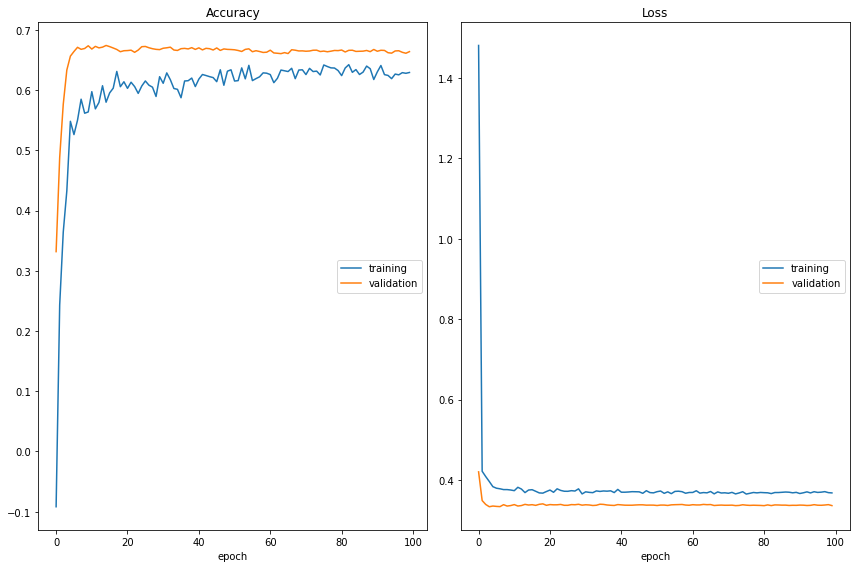

Accuracy
	training         	 (min:   -0.092, max:    0.642, cur:    0.629)
	validation       	 (min:    0.332, max:    0.674, cur:    0.664)
Loss
	training         	 (min:    0.365, max:    1.480, cur:    0.368)
	validation       	 (min:    0.334, max:    0.421, cur:    0.337)

			Test Loss: 0.394403 	 Test Accuracy: 0.724879


In [ ]:
# EDIT ME!
# define the layers of our model
layers = [  
            nn.Linear(8, 5),
            nn.SELU(),
            nn.Linear(5, 5),
            nn.Dropout(p=0.05),
            nn.SELU(),
            nn.Linear(5, 3),
            # nn.Dropout(p=0.01),
            nn.SELU(),
            nn.Linear(3, 1),
            # nn.Dropout(p=0.05),
            # nn.SELU(),
            # nn.Linear(2, 1),
            # nn.SELU()
]

# set number of epochs to train for
epochs = 100 ## Change me in problem 1.3

# check if running on CPU or GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# initialize a fully-connected classifier
fc_model = nn.Sequential(*layers).to(device)

# initialize our optimizer. We'll use Adam
optimizer = torch.optim.Adam(fc_model.parameters(), lr=0.001, weight_decay=0.01)

plotlosses = PlotLosses()

# train your  classifier
for epoch in range(1, epochs+1):
    train_loss, train_acc = trainer(fc_model, device, train_loader, optimizer)
    val_loss, val_acc = tester(fc_model, device, val_loader)
    # print('Train Epoch: {:02d} \tTraining Loss: {:.6f} \tTraining Acc: {:.6f}\n \t\t\tValidation Loss: {:.6f} \tValidation Acc: {:.6f}\n'.format(epoch, train_loss, train_acc, val_loss, val_acc))
    plotlosses.update({'acc': train_acc, 'val_acc': val_acc, 'loss': train_loss, 'val_loss': val_loss})
    plotlosses.send()  # draw, update logs, etc
    # print("Training Loss:", train_loss, "Training Accuracy:", train_acc)

# test your deep autoencoder
test_loss, test_acc = tester(fc_model, device, test_loader, True)
print('\n\t\t\tTest Loss: {:.6f} \t Test Accuracy: {:.6f}'.format(test_loss, test_acc) )